## Will Paz

In [1]:
import numpy as np
from matplotlib import pyplot as plt, image
from numpy.linalg import svd

### Part 1, Rescaling

In [2]:
A = image.imread('prison_mike.png').copy()

In [3]:
type(A[0,0,0]) == np.uint8 

# will return 'True' if it is integer valued.  
# In this case you should replace A with (1/255)*A before you proceed.  
# If it returns 'False' then assume the image is already float between 0 and 1. 

False

In [4]:
def clip01(A):
    A[A < 0] = 0
    A[A > 1] = 1
    return A

In [5]:
def scaler(A):
    R,G,B = A[:,:,0], A[:,:,1], A[:,:,2]
    
    min_R, max_R = np.min(R), np.max(R)
    min_G, max_G = np.min(G), np.max(G)
    min_B, max_B = np.min(B), np.max(B)

    def linear_function(x, min_val, max_val):
        return (x-min_val)/(max_val-min_val)
    
    scaled_R = linear_function(R, min_R, max_R)
    scaled_G = linear_function(G, min_G, max_G)
    scaled_B = linear_function(B, min_B, max_B)
    
    return np.stack([scaled_R, scaled_G, scaled_B], axis=-1)

### Part 2, Reduction

In [6]:
def reducer(picture, method='clip01', rrank=50, brank=None, grank=None):
    
    if brank is None:
        brank = rrank
    if grank is None:
        grank = rrank
    
    A = image.imread(picture).copy()
    
    if A.dtype == np.uint8:
        A = (1/255) * A
    
    def rank_reduce_svd(color, rank):
        U,S,V = np.linalg.svd(color, full_matrices=False)
        reduced_pic = np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), V[:rank, :]))
        return reduced_pic
    
    R = A[:, :, 0]
    G = A[:, :, 1]
    B = A[:, :, 2]
    
    reduced_R = rank_reduce_svd(R, rrank)
    reduced_G = rank_reduce_svd(G, grank)
    reduced_B = rank_reduce_svd(B, brank)
    
    reduced_image = np.stack([reduced_R, reduced_G, reduced_B], axis=-1)
    
    if method == 'clip01':
        reduced_image = clip01(reduced_image)
    elif method == 'scaler':
        reduced_image = scaler(reduced_image)
    
    return plt.imshow(reduced_image)

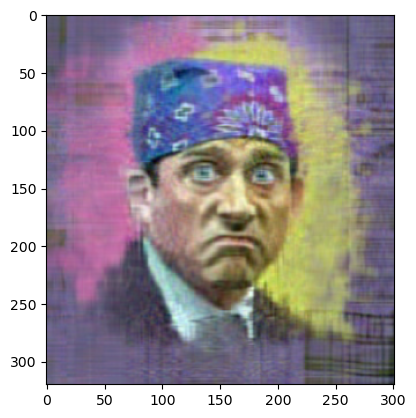

In [12]:
reducer('prison_mike.png',method='scaler',rrank=25)

### Part 3, Reflection

#### Why we chose the default method?

Before we get into the semantics of the assignment, I would like to introduce the photo that will be used. Drum roll please...it's Prison Mike. “Don’t drop the soap! Don’t drop the soap!” — Prison Mike. As you can see below here is the original image that we will be showcasing.

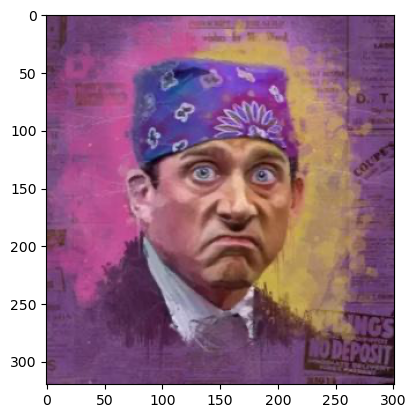

As we continue forward, the image of Prison Mike shown immediately below are using the clip01 method (left) at the specified rrank which will be the same rank for brank and grank. The scaler method (right) can be found under the same criteria.

rank | clip01 | scaler
- | - | - 
Rank 5 |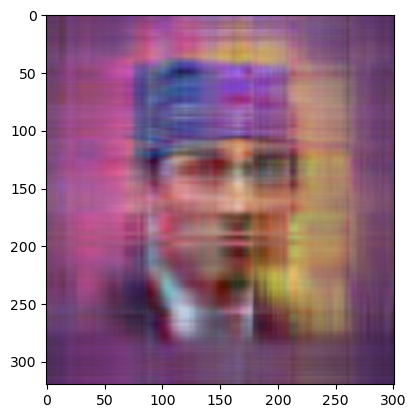 | 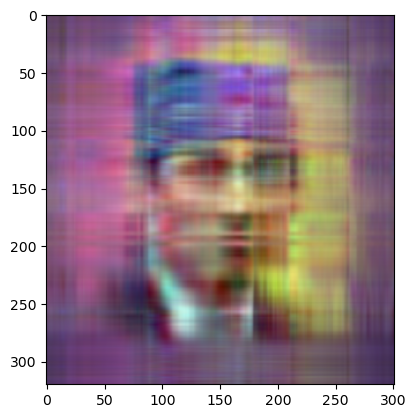|
Rank 25 |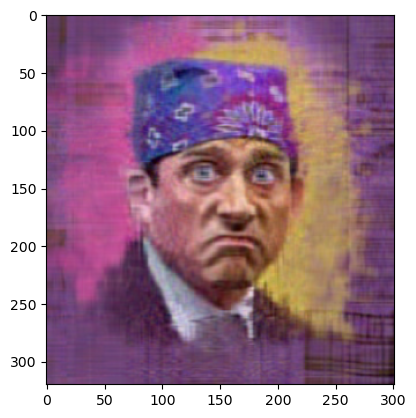 | 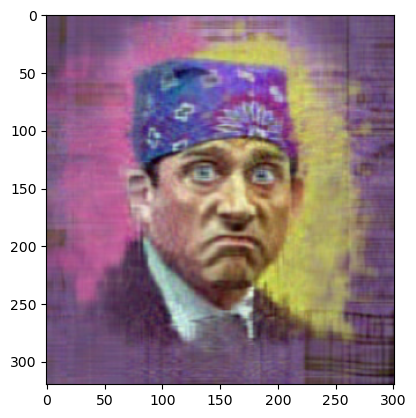|
Rank 50 |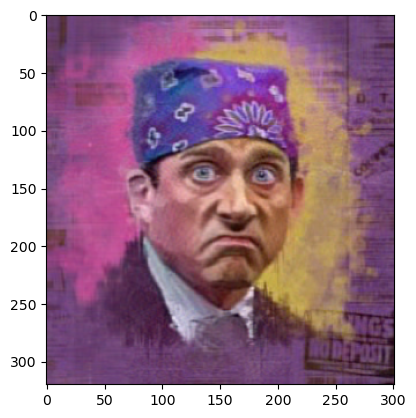 | 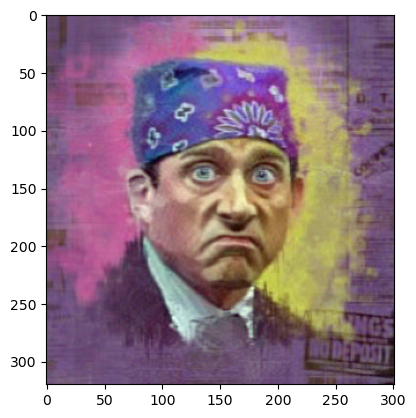|

Next, we will showcase when the one rank is higher than the other ranks (250:1:1).

rank | clip01 | scaler
- | - | - 
rrank |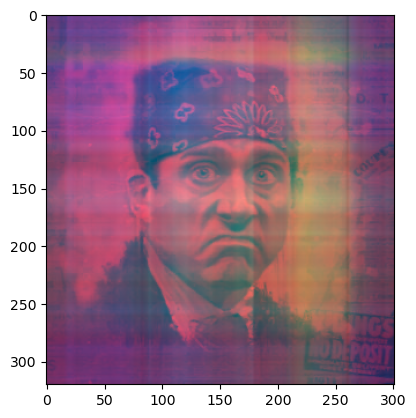 | 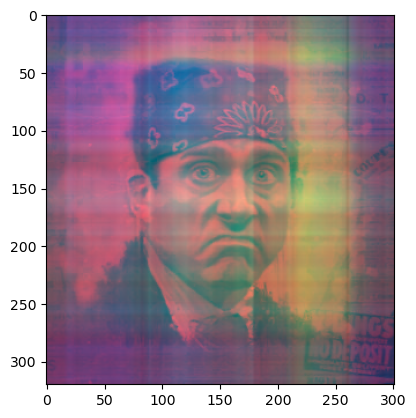|
brank |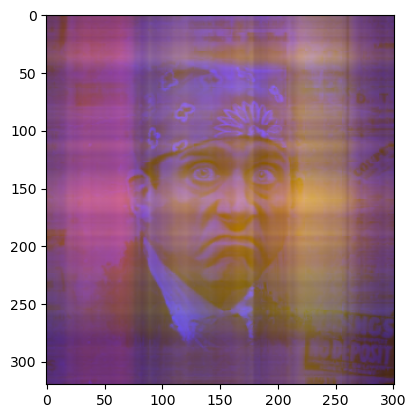 | 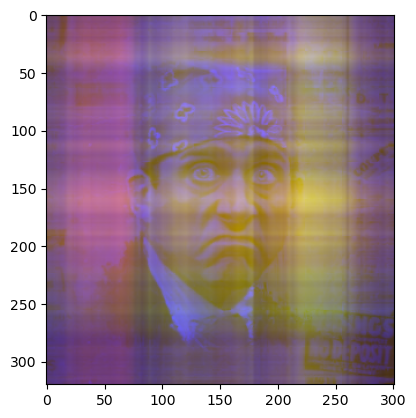|
grank |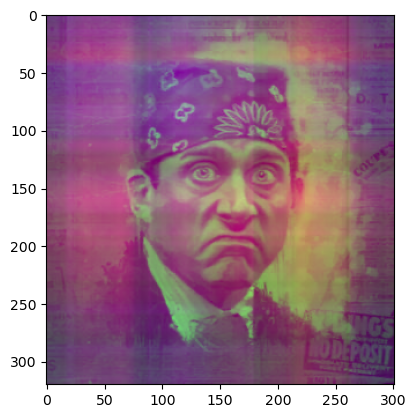 | 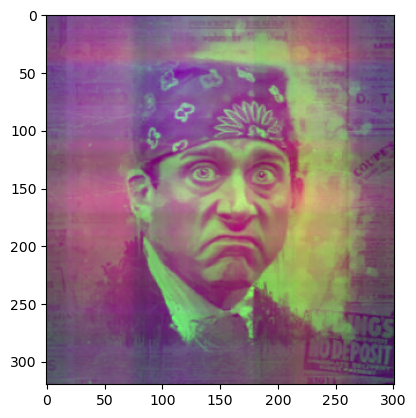|

As one can see, the clip01 method works better as in that the images look most like the original image, thus making clip01 the default method.